In [0]:
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Activation
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.regularizers import l2
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load and process data
- Reshape for first fully connected layer
- Normalize by max intensity
- OHE target values

In [0]:
# Load and process data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
num_train = X_train.shape[0]
num_test = X_test.shape[0]

# Visualize Training Data

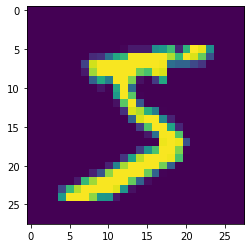

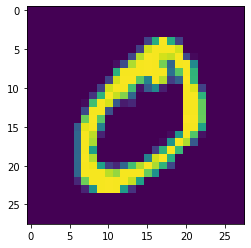

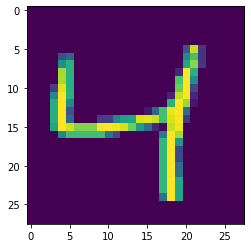

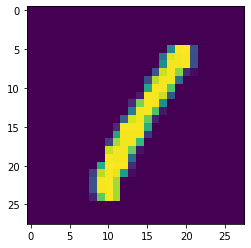

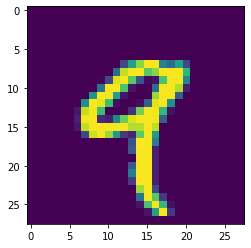

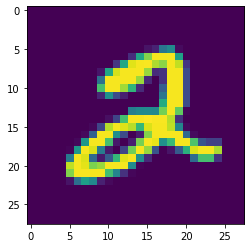

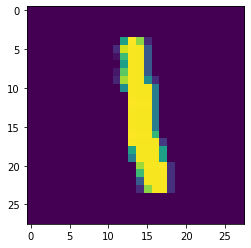

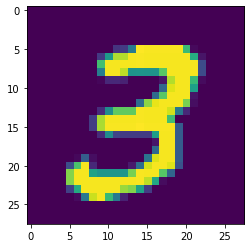

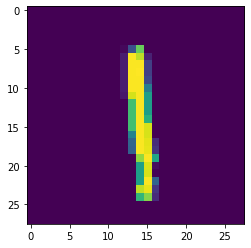

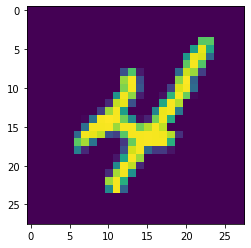

In [16]:
for i in range(10):
  plt.imshow(X_train[i])
  plt.show()

In [0]:
# Reshape 
X_train = X_train.reshape(num_train, 28*28).astype('float32')
X_test = X_test.reshape(num_test, 28*28).astype('float32')

# Normalize 
X_train /= 255
X_test /= 255

# OHE
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Grid Search Parameters
- Cross validation, 48000 for training, 12000 for validation

In [0]:
def make_mlp(hidden_size_1=32, hidden_size_2=32, l2_1=0.01, l2_2=0.01):
  mnist_model = Sequential([
    # Iput 784, output hidden_size_1
    Dense(hidden_size_1, activation='relu', input_shape=(28*28,), kernel_regularizer=l2(l2_1)),
    # Input hidden_size_1, output hidden_size_2
    Dense(hidden_size_2, activation='relu', kernel_regularizer=l2(l2_2)),
    # Input hidden_size_2, output 10 (10 classes)
    Dense(10, activation='softmax')      
  ])
  mnist_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return mnist_model


In [0]:
mnist_model = KerasClassifier(make_mlp)

In [0]:
param_grid = {'hidden_size_1': [32, 64, 256], 'hidden_size_2': [32, 64, 256],
              'l2_1': [0.1, 0.001, 0.0001], 'l2_2': [0.1, 0.001, 0.0001]}

In [6]:
grid = GridSearchCV(mnist_model, param_grid=param_grid, return_train_score=True)
grid.fit(X_train, y_train)

Epoch 1/1
48000/48000 [==============================] - 1s 24us/step
Epoch 1/1
48000/48000 [==============================] - 1s 24us/step
Epoch 1/1
48000/48000 [==============================] - 1s 23us/step
Epoch 1/1
48000/48000 [==============================] - 1s 22us/step
Epoch 1/1
48000/48000 [==============================] - 1s 22us/step
Epoch 1/1
48000/48000 [==============================] - 1s 22us/step
Epoch 1/1
48000/48000 [==============================] - 1s 22us/step
Epoch 1/1
48000/48000 [==============================] - 1s 22us/step
Epoch 1/1
48000/48000 [==============================] - 1s 23us/step
Epoch 1/1
48000/48000 [==============================] - 1s 24us/step
Epoch 1/1
48000/48000 [==============================] - 1s 25us/step
Epoch 1/1
48000/48000 [==============================] - 1s 26us/step
Epoch 1/1
48000/48000 [==============================] - 1s 23us/step
Epoch 1/1
48000/48000 [==============================] - 1s 24us/step
Epoch 1/1
48000/4800

GridSearchCV(cv=None, error_score=nan,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7fd386c8d208>,
             iid='deprecated', n_jobs=None,
             param_grid={'hidden_size_1': [32, 64, 256],
                         'hidden_size_2': [32, 64, 256],
                         'l2_1': [0.1, 0.001, 0.0001],
                         'l2_2': [0.1, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

# Grid Search Results

In [0]:
test_scores = grid.cv_results_['mean_test_score']
train_scores = grid.cv_results_['mean_train_score']

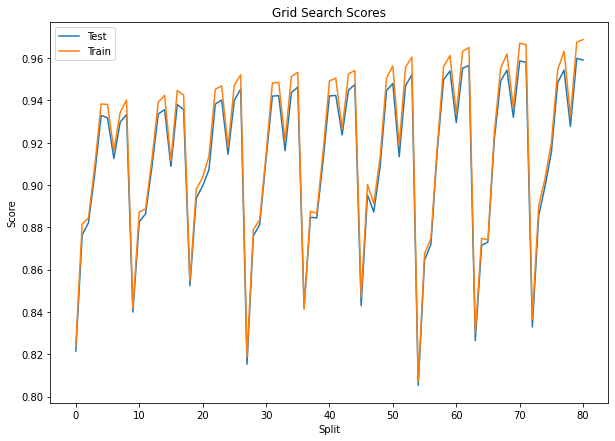

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))

ax.plot(test_scores, label='Test')
ax.plot(train_scores, label='Train')
ax.set_title('Grid Search Scores')
ax.set_xlabel('Split')
ax.set_ylabel('Score')
ax.legend()
plt.show()

In [0]:
res = pd.DataFrame(grid.cv_results_)
res.pivot_table(index=["param_hidden_size_1", "param_hidden_size_2", "param_l2_1", "param_l2_2"],
                values=["mean_test_score", "rank_test_score"])

mean_test_score  rank_test_score
param_hidden_size_1 param_hidden_size_2 param_l2_1 param_l2_2                                  
32                  32                  0.0001     0.0001             0.934350               33
                                                   0.0010             0.933433               35
                                                   0.1000             0.907967               51
                                        0.0010     0.0001             0.932800               36
                                                   0.0010             0.932533               37
...                                                                        ...              ...
256                 256                 0.0010     0.0010             0.953250                8
                                                   0.1000             0.914517               44
                                        0.1000     0.0001             0.894000               58
                                                   0.0010             0.888983               60
                                                   0.1000             0.845783               75

[81 rows x 2 columns]

# Get the best parameters

In [0]:
# Get the values with the highest test score
best_row = res[res['rank_test_score'] == 1]
hidden_size_1 = int(best_row['param_hidden_size_1'])
hidden_size_2 = int(best_row['param_hidden_size_2'])
l2_layer_1 = np.float(best_row['param_l2_1'])
l2_layer_2 = np.float(best_row['param_l2_2'])
print(f'Hidden layer 1 optimal number of units: {hidden_size_1}')
print(f'Hidden layer 2 optimal number of units: {hidden_size_2}')
print(f'Hidden layer 1 L2 value: {l2_layer_1}')
print(f'Hidden layer 2 L2 value: {l2_layer_2}')

Hidden layer 1 optimal number of units: 256
Hidden layer 2 optimal number of units: 256
Hidden layer 1 L2 value: 0.0001
Hidden layer 2 L2 value: 0.0001


#Evaluate model with best parameters on the Test Set

In [19]:
# Evaluate on test set
grid.best_estimator_.score(X_test, y_test)

10000/10000 [==============================] - 1s 50us/step


0.9661999940872192

# Comments on model performance

Based on the grid searching results, the optimal parameters were found. This 256 nodes in each of the two hidden layers and a regularization value of 0.0001. Using these parameters, the model scored 96.67% accuracy on the test set.